In [8]:
import zipfile
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('data/raw')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os


In [2]:
import os
path = 'data/raw/waist_folding'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, f'waist_folding {str(index)}.jpg'))


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data/raw/waist_folding\\waist_folding 10.jpg' -> 'data/raw/waist_folding\\waist_folding 2.jpg'

In [6]:
path = 'data/raw/crescent_gap'
files = os.listdir(path)
import cv2
x = []
y = []
for i, file in enumerate(files):
    img = cv2.imread(path + f'/crescent_gap {i}.jpg')
    resized = cv2.resize(img, (56,56))
    x.append(resized)
    y.append(0)
    
path = 'data/raw/welding_line'
files = os.listdir(path)
for i, file in enumerate(files):
    img = cv2.imread(path + f'/welding_line {i}.jpg')
    resized = cv2.resize(img, (56,56))
    x.append(resized)
    y.append(1)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
x_train = np.array(x_train, dtype = 'float')
y_train = np.array(y_train, dtype = 'float').astype('float32').reshape((-1,1))
x_test = np.array(x_test, dtype = 'float')
y_test = np.array(y_test, dtype = 'float').astype('float32').reshape((-1,1))

In [ ]:
n_classes = 2

x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(56, kernel_size=(2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(56,56,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(90, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
N = 100

H = model.fit(x_train, y_train, batch_size = 10, epochs = N, validation_data = (x_test, y_test))


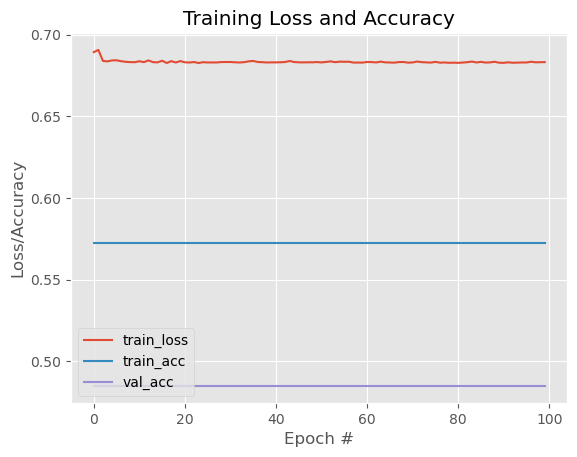

In [20]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [21]:
path = 'data/raw/welding_line'

img_test = cv2.imread(fr'{path}/welding_line 10.jpg')
img_test = cv2.resize(img_test, (56, 56))
img_test = [img_test]
img_test = np.array(img_test, dtype = 'float')
img_test /= 255
model.predict(img_test)

1/1 [==============================] - 0s 153ms/step


array([[0.4577674, 0.5820425]], dtype=float32)